## 1. 常微分方程式

## まとめと演習

### 1.  調和振動子(1次元)

![](fig/harmonic.png) 

- １次元座標 $q$ 上における質量 $m$ の質点の運動（時刻 $t$ における質点の位置 $q(t)$，運動量 $p(t)=v(t)/m$）を考える．今，一端を原点 ($q=0$) に固定したバネ定数 $k$ の線形バネの他端にこの質点をつなぎ．初期位置 $q(t)=q_0$，初期速度 $v(0)=v_0$ から運動を開始させる．質点に作用する力は $F=−k q(t)$ であるので，Newtonの運動方程式
$$
F=m\frac{d^2 q(t)}{dt^2}=-kq(t)\tag{1}
$$<br>
を初期条件の下で解くことで質点の位置の時間変化 $q(t)$ を知ることができる．


- Newtonの運動方程式と等価な結果は，Hamiltonian $H$ を用いたHamiltonの運動方程式
<br><br>
$$
\frac{dq}{dt}-\frac{\partial H}{\partial p}=0\tag{2}
$$
<br>
$$
\frac{dp}{dt}+\frac{\partial H}{\partial q}=0\tag{3}
$$
を解いても得られる．上の１次元調和振動子の例では
$$
H=\frac{1}{2m}p^2+\frac{k}{2}q^2\tag{4}
$$
であるので，運動方程式は2つの連立1次常微分方程式
$$
\frac{dq}{dt}-\frac{p}{m}=0\tag{5}
$$
<br>
$$
\frac{dp}{dt}+kq=0\tag{6}
$$
で表される．


- ここで，複素変数 $y\equiv q+\frac{i}{\sqrt{km}}p$，及び定数 $\omega\equiv\sqrt{\frac{k}{m}} $ を導入すると，連立1次常微分方程式(5)(6)は，授業中に安定性の解析を行った単振動する解を持つ常微分方程式
$$
\frac{dy}{dt}+i\omega y=0\tag{7}
$$
と等価であることがわかる．


- 今回のまとめと演習では，簡単化のために $k=1$，$m=1$ としたので 
$$
H=\frac{p^2+q^2}{2}\tag{8}
$$
であり，運動方程式は
$$
\frac{dq}{dt}-p=0\tag{9}
$$
<br>
$$
\frac{dp}{dt}+q=0\tag{10}
$$
となる．


- この連立1次常微分方程式を，初期条件$[p_0,q_0]=[1,0],\delta t=0.1$ の下でシミュレーションによって解くための差分方程式と，プログラムのサンプルコードを以下にまとめる．

#### Code examples

##### 0. Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

##### 1. Euler法

$$
q_{n+1}=q_n+\delta t p_n
$$

$$
p_{n+1}=p_n-\delta t q_n
$$

In [2]:
imax = 100 # シミュレーションの総ステップ数
dt = 0.1 # １ステップ数の刻み幅
p = np.zeros(imax) # 配列 p[0,1,2,...,imax-1]を作成し、全ての要素の値を0で初期化する
q = np.zeros(imax) # 配列 q[0,1,2,...,imax-1]を作成し、全ての要素の値を0で初期化する
e = np.zeros(imax) # 配列 e[0,1,2,...,imax-1]を作成し、全ての要素の値を0で初期化する
t = np.zeros(imax) # 配列 t[0,1,2,...,imax-1]を作成し、全ての要素の値を0で初期化する
p[0] = 1.0
q[0] = 0.0
e[0] = 0.5*(p[0]**2 + q[0]**2)

for i in range(0,imax-1):
    pnew = p[i] - dt*q[i]
    qnew = q[i] + dt*p[i]
    p[i+1] = pnew
    q[i+1] = qnew
    e[i+1] = 0.5*(p[i+1]**2 + q[i+1]**2)
    t[i+1] = dt*(i+1)

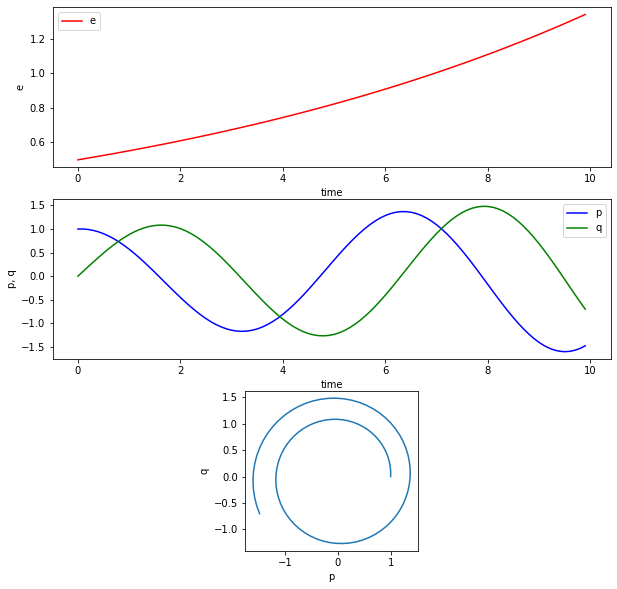

In [3]:
plt.figure(figsize = (10, 10)) # 何も描画されていない新しいウィンドウを描画
# plot e(i) vs. t(i)
plt.subplot(311) # plt.subplot(行数, 列数, 何番目のプロットか)
plt.plot(t, e,label='e', color ='red') # e vs tのプロットを実行
plt.legend(loc='best') # 凡例の位置の指定
plt.xlabel('time') # x軸ラベルの指定
plt.ylabel('e') # y軸ラベルの指定
# plot p(i),q(i) vs. t(i)
plt.subplot(312)
plt.plot(t, p,label='p', color ='blue')
plt.plot(t, q,label='q', color ='green')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('p, q')
# plot q(i) vs. p(i)
plt.subplot(313)
plt.plot(p, q)
plt.xlabel('p')
plt.ylabel('q')
plt.gca().set_aspect('equal', adjustable='box') #このグラフを正方形に固定

##### 2. Leap-Frog法

$$q_{n+1}=q_{n-1}+2\delta t p_n$$
 
$$p_{n+1}=p_{n-1}-2\delta t q_n$$

In [4]:
imax = 5000
dt = 0.1
p = np.zeros(imax)
q = np.zeros(imax)
e = np.zeros(imax)
t = np.zeros(imax)
p[0] = 1.0
q[0] = 0.0
e[0] = 0.5*(p[0]**2 + q[0]**2)
pold = p[0] + dt*q[0]
qold = q[0] - dt*p[0]

for i in range(0,imax-1):
    pnew = pold - 2.0*dt*q[i]
    qnew = qold + 2.0*dt*p[i]
    pold = p[i]
    qold = q[i]
    p[i+1] = pnew
    q[i+1] = qnew
    e[i+1] = 0.5*(p[i+1]**2 + q[i+1]**2)
    t[i+1] = dt*(i+1)

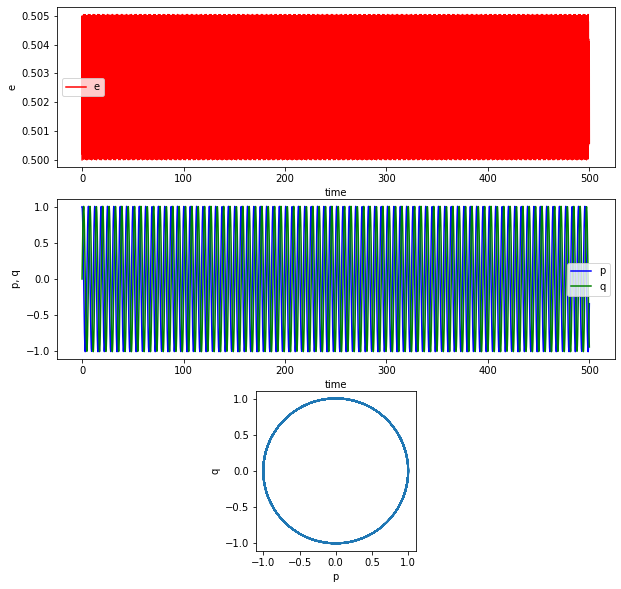

In [5]:
plt.figure(figsize = (10, 10))
# plot e vs. t
plt.subplot(311)
plt.plot(t, e,label='e', color ='red')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('e')
# plot p,q vs. t
plt.subplot(312)
plt.plot(t, p,label='p', color ='blue')
plt.plot(t, q,label='q', color ='green')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('p, q')
# plot q vs. p
plt.subplot(313)
plt.plot(p, q)
plt.xlabel('p')
plt.ylabel('q')
plt.gca().set_aspect('equal', adjustable='box')

##### 3. Runge-Kutta法（2次）

$$
q_{n+\frac{1}{2}}=q_n+\frac{1}{2}\delta t p_n
$$
 
$$
p_{n+\frac{1}{2}}=p_n-\frac{1}{2}\delta t q_n
$$
 
$$
q_{n+1}=q_n+\delta t p_{n+\frac{1}{2}}
$$
 
$$
p_{n+1}=p_n-\delta t q_{n+\frac{1}{2}}
$$

In [6]:
imax = 5000
dt = 0.1
p = np.zeros(imax)
q = np.zeros(imax)
e = np.zeros(imax)
t = np.zeros(imax)
p[0] = 1.0
q[0] = 0.0
e[0] = 0.5*(p[0]**2 + q[0]**2)

for i in range(0,imax-1):
    pmid = p[i] - 0.5*dt*q[i]
    qmid = q[i] + 0.5*dt*p[i]
    pnew = p[i] - dt*qmid
    qnew = q[i] + dt*pmid
    p[i+1] = pnew
    q[i+1] = qnew
    e[i+1] = 0.5*(p[i+1]**2 + q[i+1]**2)
    t[i+1] = dt*(i+1)

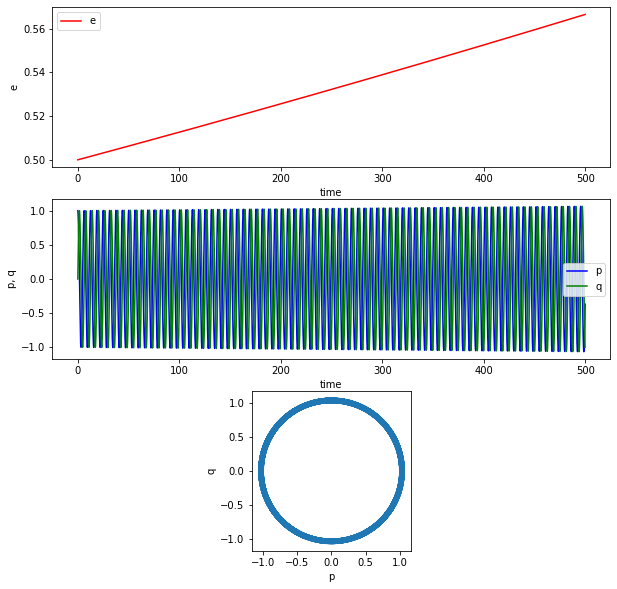

In [7]:
plt.figure(figsize = (10, 10))
# plot e vs. t
plt.subplot(311)
plt.plot(t, e,label='e', color ='red')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('e')
# plot p,q vs. t
plt.subplot(312)
plt.plot(t, p,label='p', color ='blue')
plt.plot(t, q,label='q', color ='green')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('p, q')
# plot q vs. p
plt.subplot(313)
plt.plot(p, q)
plt.xlabel('p')
plt.ylabel('q')
plt.gca().set_aspect('equal', adjustable='box')

##### 4. Runge-Kutta法（4次）

$$
q'=q_n+\frac{1}{2}\delta t p_n
$$
 
$$
p'=p_n-\frac{1}{2}\delta t q_n
$$
 
$$
q''=q_n+\frac{1}{2}\delta t p'
$$
 
$$
p''=p_n-\frac{1}{2}\delta t q'
$$
 
$$
q'''=q_n+\delta t p''
$$
 
$$
p'''=p_n-\delta t q''
$$
 
$$
q_{n+1}=q_n+\frac{1}{6}\delta t (p_n+2p'+2p''+p''')
$$
 
$$
p_{n+1}=p_n-\frac{1}{6}\delta t (q_n+2q'+2q''+q''')
$$

In [8]:
imax = 5000
dt = 0.1
p = np.zeros(imax)
q = np.zeros(imax)
e = np.zeros(imax)
t = np.zeros(imax)
p[0] = 1.0
q[0] = 0.0
e[0] = 0.5*(p[0]**2 + q[0]**2)

for i in range(0,imax-1):
    p1 = p[i] - 0.5*dt*q[i]
    q1 = q[i] + 0.5*dt*p[i]
    p2 = p[i] - 0.5*dt*q1
    q2 = q[i] + 0.5*dt*p1
    p3 = p[i] - dt*q2
    q3 = q[i] + dt*p2
    pnew = p[i] - dt*(q[i] + 2.0*q1 + 2.0*q2 + q3)/6.0
    qnew = q[i] + dt*(p[i] + 2.0*p1 + 2.0*p2 + p3)/6.0
    p[i+1] = pnew
    q[i+1] = qnew
    e[i+1] = 0.5*(p[i+1]**2 + q[i+1]**2)
    t[i+1] = dt*(i+1)

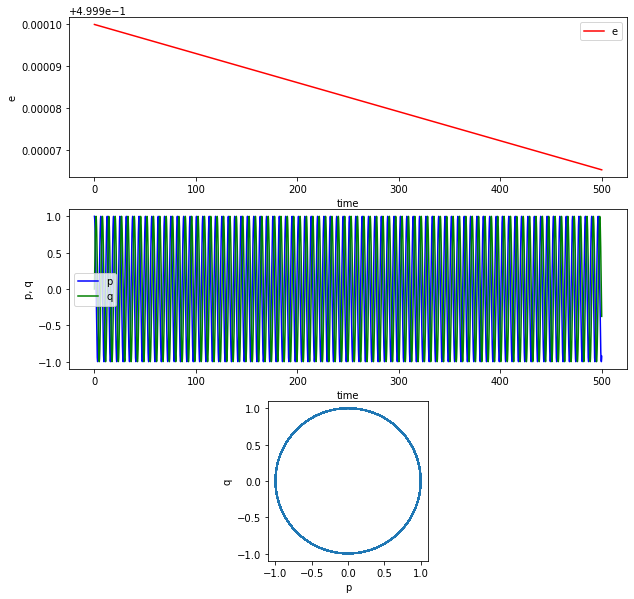

In [9]:
plt.figure(figsize = (10, 10))
# plot e vs. t
plt.subplot(311)
plt.plot(t, e,label='e', color ='red')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('e')
# plot p,q vs. t
plt.subplot(312)
plt.plot(t, p,label='p', color ='blue')
plt.plot(t, q,label='q', color ='green')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('p, q')
# plot q vs. p
plt.subplot(313)
plt.plot(p, q)
plt.xlabel('p')
plt.ylabel('q')
plt.gca().set_aspect('equal', adjustable='box')

##### 5. Predictor-Corrector法

$$
q'_{n+1}=q_n+\delta t p_n
$$
 
$$
p'_{n+1}=p_n-\delta t q_n
$$
 
$$
q_{n+1}=q_n+\frac{1}{2}\delta t [p'_{n+1}+p_n]
$$
 
$$
p_{n+1}=p_n+\frac{1}{2}\delta t [q'_{n+1}+q_n]
$$

In [10]:
imax = 5000
dt = 0.1
p = np.zeros(imax)
q = np.zeros(imax)
e = np.zeros(imax)
t = np.zeros(imax)
p[0] = 1.0
q[0] = 0.0
e[0] = 0.5*(p[0]**2 + q[0]**2)

for i in range(0,imax-1):
    ppre = p[i] - dt*q[i]
    qpre = q[i] + dt*p[i]
    pcor = p[i] - 0.5*dt*(q[i] + qpre)
    qcor = q[i] + 0.5*dt*(p[i] + ppre)
    p[i+1] = pcor
    q[i+1] = qcor
    e[i+1] = 0.5*(p[i+1]**2 + q[i+1]**2)
    t[i+1] = dt*(i+1)

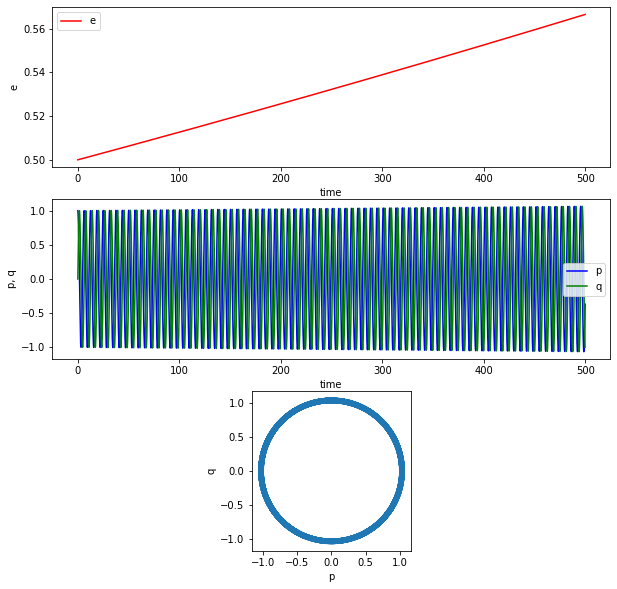

In [11]:
plt.figure(figsize = (10, 10))
# plot e vs. t
plt.subplot(311)
plt.plot(t, e,label='e', color ='red')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('e')
# plot p,q vs. t
plt.subplot(312)
plt.plot(t, p,label='p', color ='blue')
plt.plot(t, q,label='q', color ='green')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('p, q')
# plot q vs. p
plt.subplot(313)
plt.plot(p, q)
plt.xlabel('p')
plt.ylabel('q')
plt.gca().set_aspect('equal', adjustable='box')

##### 6. Symplectic法（1次）

$$
q_{n+1}=q_n+\delta t p_n
$$

$$
p_{n+1}=p_n-\delta t q_{n+1}
$$

In [12]:
imax = 5000
dt = 0.1
p = np.zeros(imax)
q = np.zeros(imax)
e = np.zeros(imax)
es = np.zeros(imax)
t = np.zeros(imax)
p[0] = 1.0
q[0] = 0.0
e[0] = 0.5*(p[0]**2 + q[0]**2)
es[0] = e[0] + 0.5*p[0]*q[0]*dt

for i in range(0,imax-1):
    qnew = q[i] + dt*p[i]
    pnew = p[i] - dt*qnew
    p[i+1] = pnew
    q[i+1] = qnew
    e[i+1] = 0.5*(p[i+1]**2 + q[i+1]**2)
    es[i+1] = e[i+1] + 0.5*p[i+1]*q[i+1]*dt
    t[i+1] = dt*(i-1)

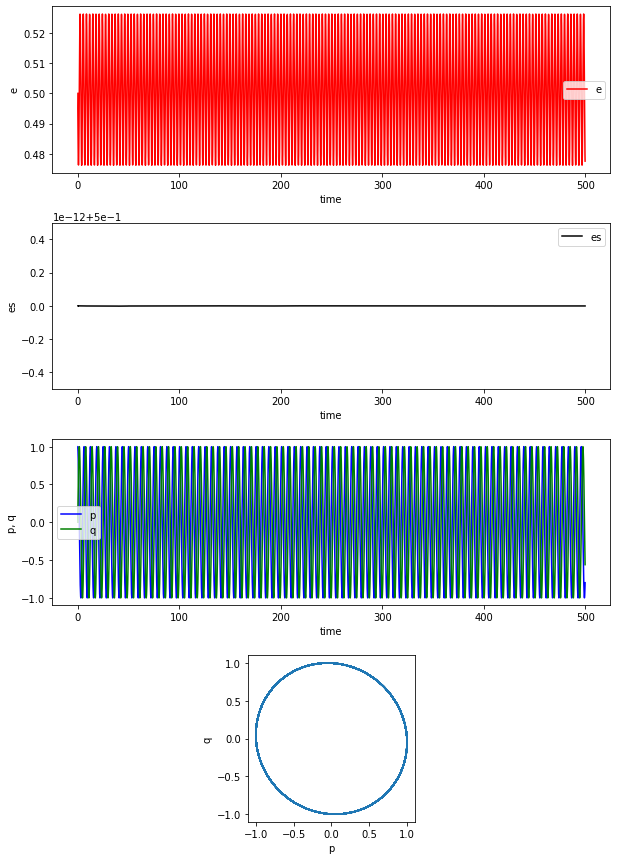

In [13]:
plt.figure(figsize = (10, 15))
plt.subplots_adjust(hspace=0.3)
# plot e vs. t
plt.subplot(411)
plt.plot(t, e,label='e', color ='red')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('e')
# plot es vs. t
plt.subplot(412)
plt.plot(t, es,label='es', color ='black')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('es')
# plot p,q vs. t
plt.subplot(413)
plt.plot(t, p,label='p', color ='blue')
plt.plot(t, q,label='q', color ='green')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('p, q')
# plot q vs. p
plt.subplot(414)
plt.plot(p, q)
plt.xlabel('p')
plt.ylabel('q')
plt.gca().set_aspect('equal', adjustable='box')

## 課題

### 1.
- ４次のRunge-Kutta法 ([解法のヒント](http://www-tph.cheme.kyoto-u.ac.jp/p/ryoichi/lec/ces/report2-rk4.pdf "解法のヒント")) を用いて以下の非調和振動子の時間発展を求めよ。
<br><br>
$$
H = \frac{p^2}{2} + \frac{q^4}{4}
$$
<br>
初期条件 $[p_0, q_0] = [2^n, 0]\ \  (n=0,1,2,3)$ として $q(t)$ vs. $p(t)$ をプロットし、結果を考察せよ。
